In [11]:
# probing single passage data.
# Relative point

import vtk
import numpy as np

DATA_DIR = '/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/'
DATA_DIR = '/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/'
ITER_LIST = range(14500,28901,10)
#ITER_LIST = range(14500,14600,10)


%matplotlib inline 
import matplotlib.pyplot as plt

import pickle


In [2]:
# input : time (0..191), block id list (0..35)
# output: the selected blocks
def load_list(timestep, blocklist=range(0,36)):
    gfile = DATA_DIR + 'r35.r1b1.p3d.g'
    qfile = DATA_DIR + 'r35.r1b1.p3d.q'+str(timestep)
    print qfile

    reader = vtk.vtkMultiBlockPLOT3DReader()
    reader.SetXYZFileName(gfile);
    reader.SetQFileName(qfile);
    reader.SetScalarFunctionNumber(110);
    reader.SetVectorFunctionNumber(200);
    reader.SetAutoDetectFormat(1);
    #print qfile

    #reader.AddFunction(100); #density
    reader.AddFunction(110); #pressure
    #reader.AddFunction(120); #temp
    #reader.AddFunction(130); #enthalpy
    #reader.AddFunction(140); #internal energy
    #reader.AddFunction(144); #kinetic energy
    #reader.AddFunction(153); #vel magnitude
    #reader.AddFunction(163); #stagnation energy
    #reader.AddFunction(170); #entropy
    #reader.AddFunction(184); #swirl
    #reader.AddFunction(211); #vorticity magnitude

    #available vector fields in the data
    reader.AddFunction(200); #velocity
    #reader.AddFunction(201); #vorticity
    #reader.AddFunction(202); #momentum
    #reader.AddFunction(210); #pressure gradient
    #reader.AddFunction(212); #starin rate

    try:
        reader.Update()
    except:
        print 'fail to load file'
    return reader.GetOutput().GetBlock(0)

In [3]:
from IPython.display import display
from IPython.display import Image
def vtk_show(renderer, w=320, h=240, interactive=False):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    if not interactive:
        renderWindow = vtk.vtkRenderWindow()
        #renderWindow.SetOffScreenRendering(1)
        renderWindow.AddRenderer(renderer)
        renderWindow.SetSize(w, h)
        renderWindow.Render()
    
    else:
        renderWindow = vtk.vtkRenderWindow()
        renderWindow.AddRenderer(renderer)
        renderWindow.SetSize(w, h)
        
        interactor = vtk.vtkRenderWindowInteractor()
        interactor.SetRenderWindow(renderWindow)
        renderWindow.Render()
        interactor.Start()

    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = str(buffer(writer.GetResult()))
    
    i=Image(data) 
    return i

if 0:
    sphereSource = vtk.vtkSphereSource()
    sphereSource.SetPhiResolution(200)
    sphereSource.SetThetaResolution(200)
    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputConnection(sphereSource.GetOutputPort())

    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(1,1,0)

    renderer = vtk.vtkRenderer()
    renderer.AddActor(actor)
    renderer.SetBackground(1, 1, 1)
    im = vtk_show(renderer, 200, 200)
    display(im)

In [4]:
def plot_block(data):
    # outline
    outline = vtk.vtkOutlineFilter()
    outline.SetInputData(data)
    mapper2 = vtk.vtkPolyDataMapper()
    mapper2.SetInputConnection(outline.GetOutputPort())

    actor = vtk.vtkActor()
    actor.SetMapper(mapper2)
    actor.GetProperty().SetColor(.5,.5,.5)

    renderer = vtk.vtkRenderer()
    renderer.AddActor(actor)
    renderer.SetBackground(1, 1, 1)

    im = vtk_show(renderer, interactive = True)
    display(im)
    
    
def test():
    data = load_list(0,[0]).GetBlock(0)
    plot_block(data)

#test()

In [5]:
RUN=1
dim = [181,71,56]
size = 181*71*56
if 1:
    samplei = [50]
    samplej = [57]
    samplek = [1]
else:
    samplei = range(10,80,4)
    samplej = range(40,60,10)
    samplek = range(0,1,4)

def xyz_id(x,y,z):
    return x+dim[0]*(y+dim[1]*z)

sample_xyz = []
sample_id_list = []
for z in samplek:
    for y in samplej:
        for x in samplei:
            sample_xyz.append([x, y, z])
            sample_id_list.append(xyz_id(x,y,z))
samples = len(sample_id_list)
print 'samples:' + str( samples )
        


samples:1


In [12]:
import array
if RUN:
    pressure_table = []
    negucount_table = []
    stop = 0
    for t in ITER_LIST:
        print t
        tmpp = []
        tmpuvel = []
        data = load_list(t)
        if not data:
            print 'No Data!'
            stop = 1
            break
        # pressure
        pres_array = data.GetPointData().GetArray("Pressure")
        tmpp.append([pres_array.GetTuple1(id) for id in sample_id_list]  )

        # neg u count
        v_array = data.GetPointData().GetArray("Velocity")
        tmpuvel.append(sum([v_array.GetTuple3(id)[0]<0 for id in range(0, size)] ))
        if stop :
            break
        pressure_table.append(tmpp)        
        negucount_table.append(tmpuvel)

    np_pressure_table = np.array(pressure_table)
    del(pressure_table)
    np_negucount_table = np.array(negucount_table)
    del(negucount_table)

    #with open('pressures.ts15.bs36.pickle', 'w') as f:
    #    pickle.dump([samplei, samplej, samplek, sample_id_list, samples, blist, np_pressure_table, np_negucount_table], f)
        
else:
    NIL
    #with open('pressures.ts15.bs36.pickle') as f:
    #    samplei, samplej, samplek, sample_id_list, samples, blist, np_pressure_table, np_negucount_table = pickle.load(f)
        

14500
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14500
14510
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14510
14520
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14520
14530
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14530
14540
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14540
14550
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14550
14560
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14560
14570
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14570
14580
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14580
14590
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14590
14600
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14600
14610
/home/chenchu/turbine_Stg_wd/single_passage/16.00_13.80/r35.r1b1.p3d.q14610
14620
/home/chen

(1441, 1, 1)
[[[ 0.6347788 ]]

 [[ 0.62918049]]

 [[ 0.62136638]]

 ..., 
 [[ 0.69027519]]

 [[ 0.67713177]]

 [[ 0.66228139]]]


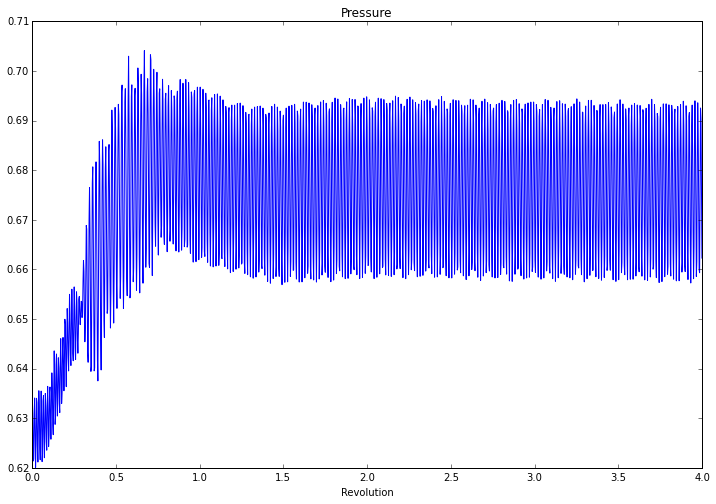

In [56]:
print np_pressure_table.shape
print np_pressure_table
plt.figure(facecolor='white', figsize=(12,8))
t = np.arange(0,len(ITER_LIST))/360.0
plt.plot(t, np.squeeze( np_pressure_table ) )
plt.title ('Pressure')
plt.xlabel('Revolution')
plt.show()

In [55]:
np.squeeze(np_pressure_table).shape


(1441,)

In [58]:
#print np.shape(np_negucount_table)[0]
for i in range(0, np.shape(np_pressure_table)[0]):
    print np_pressure_table[i][0][0]

0.634778797626
0.629180490971
0.621366381645
0.621745228767
0.630981564522
0.63407433033
0.626681745052
0.620077967644
0.624710202217
0.634019374847
0.633148014545
0.624326169491
0.621159553528
0.629131615162
0.635538160801
0.632089018822
0.624006867409
0.621624588966
0.629742980003
0.635464668274
0.630169212818
0.621248066425
0.622858583927
0.633438766003
0.634580492973
0.62652695179
0.62202501297
0.628211319447
0.634993672371
0.632484614849
0.625236153603
0.623547196388
0.631962299347
0.63641756773
0.631269097328
0.624271869659
0.626574397087
0.635302841663
0.636281371117
0.629787147045
0.625764489174
0.632737159729
0.63913422823
0.636017203331
0.628597080708
0.626679301262
0.636269450188
0.643571197987
0.638163805008
0.628757476807
0.630285859108
0.640754818916
0.642947077751
0.634853184223
0.630441665649
0.636508285999
0.642187178135
0.640093147755
0.632955431938
0.631130099297
0.64058804512
0.646036326885
0.640369296074
0.632960498333
0.63495361805
0.643988668919
0.646278679371
0.

In [8]:
print np_pressure_table.shape
plt.figure(facecolor='white', figsize=(12,8))
for b in range(0, blocks):
    plt.plot(range(1, ts+1), np_negucount_table[:,b]+b, color=cmap(float(b)/blocks))
plt.legend(llist, 'upper center', ncol=9, bbox_to_anchor=(0.5, -0.05))
plt.title ('Negative velocity count')
plt.show()


(14, 36)


NameError: name 'blocks' is not defined

In [89]:
size


600376

In [49]:
#with open('pressures.ts15.bs36.pickle', 'w') as f:
#    pickle.dump([samplei, samplej, samplek, sample_id_list, samples, blist, np_pressure_prob_table], f)
sample_xyz=[]
for z in samplek:
    for y in samplej:
        for x in samplei:
            sample_xyz.append([x, y, z])

(14, 36)


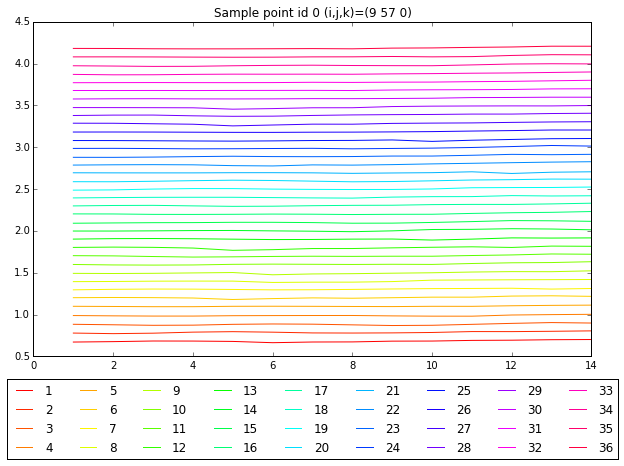

(14, 36)


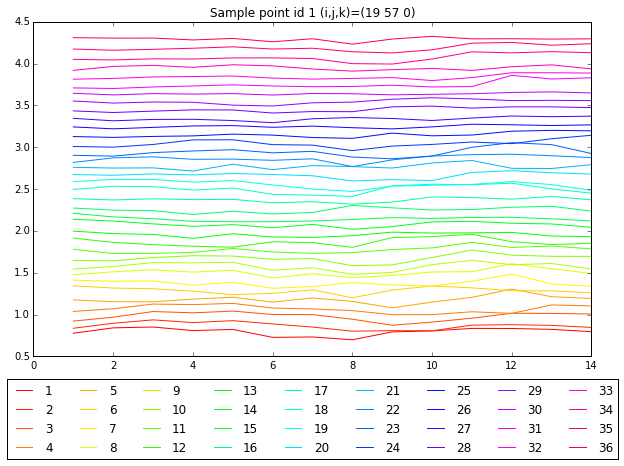

(14, 36)


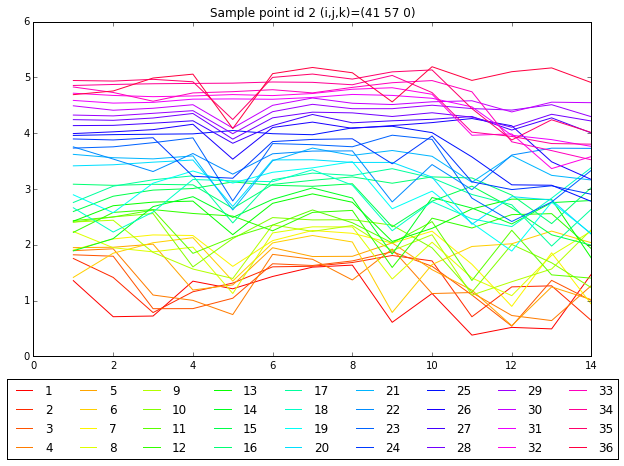

(14, 36)


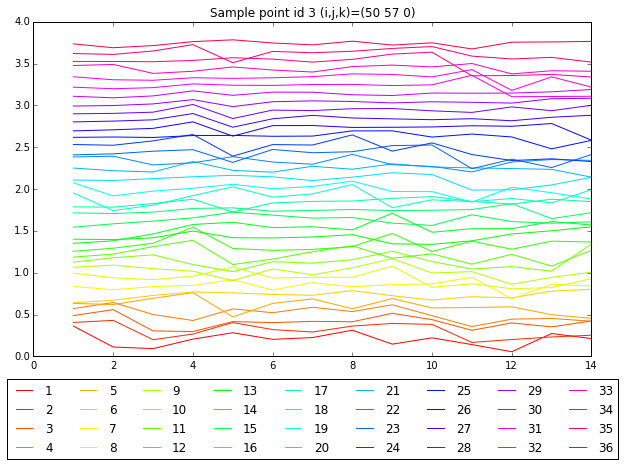

(14, 36)


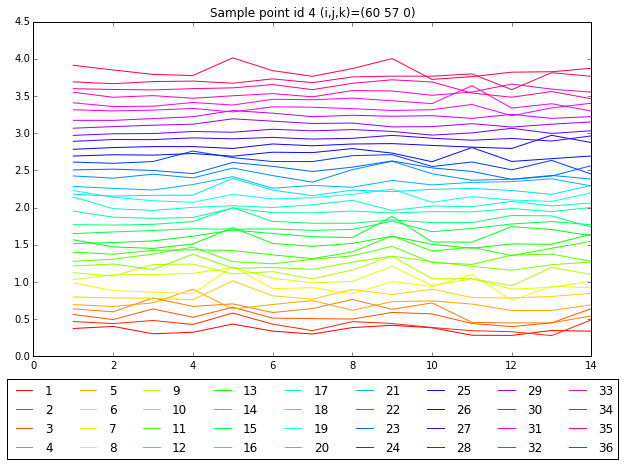

(14, 36)


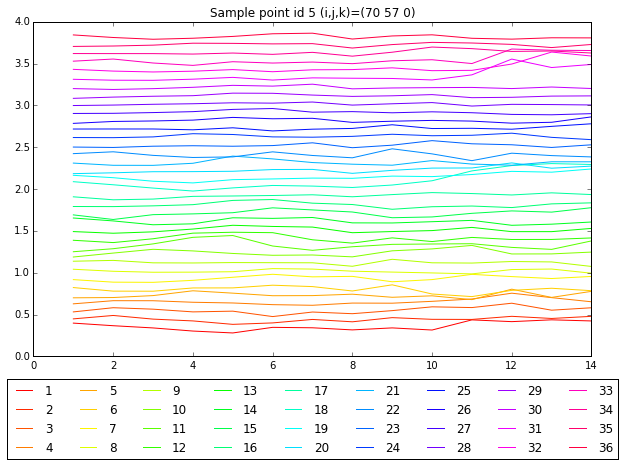

(14, 36)


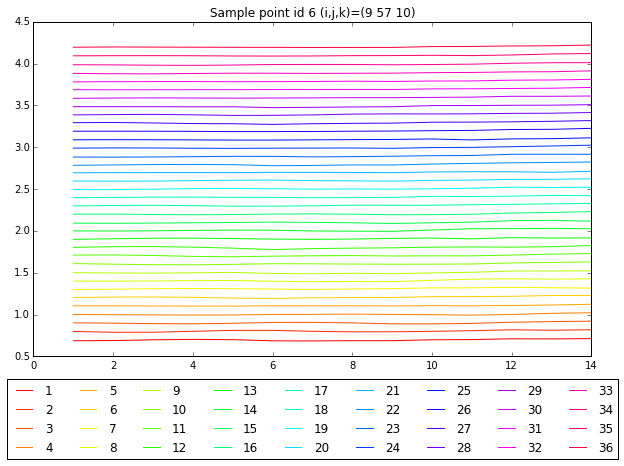

(14, 36)


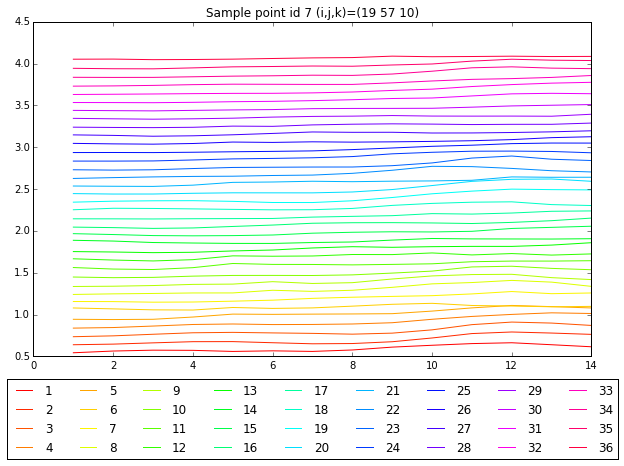

(14, 36)


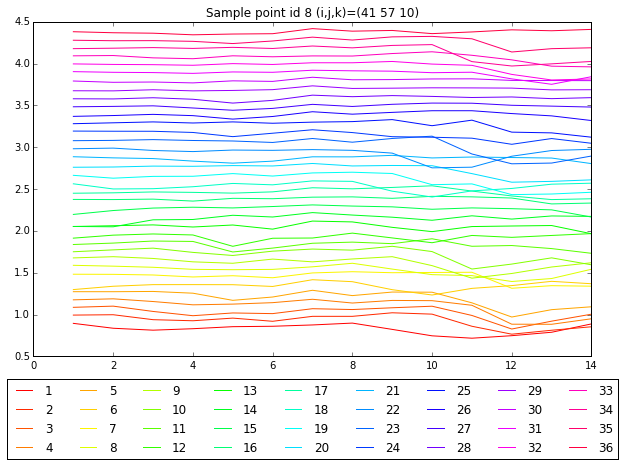

(14, 36)


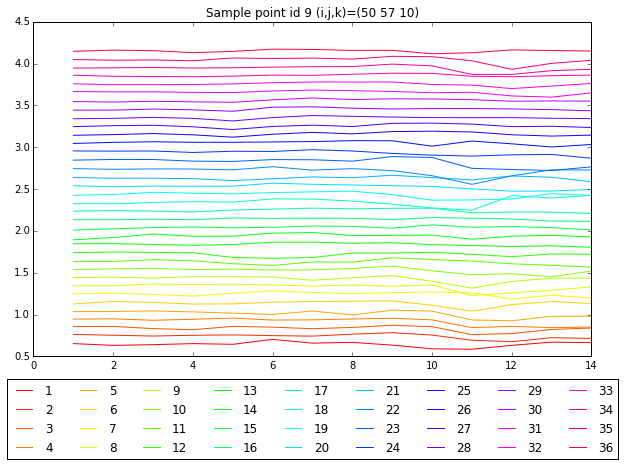

(14, 36)


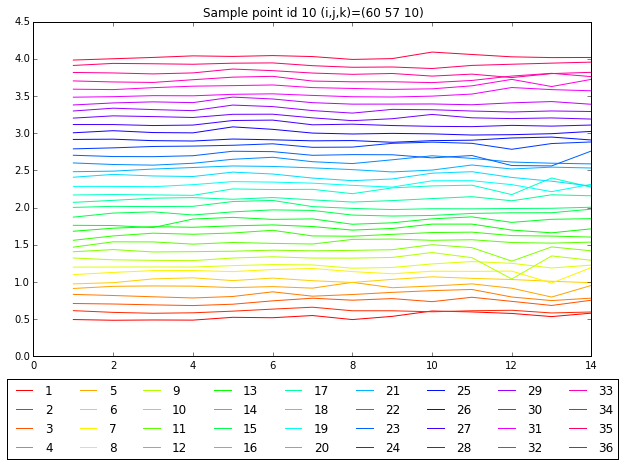

(14, 36)


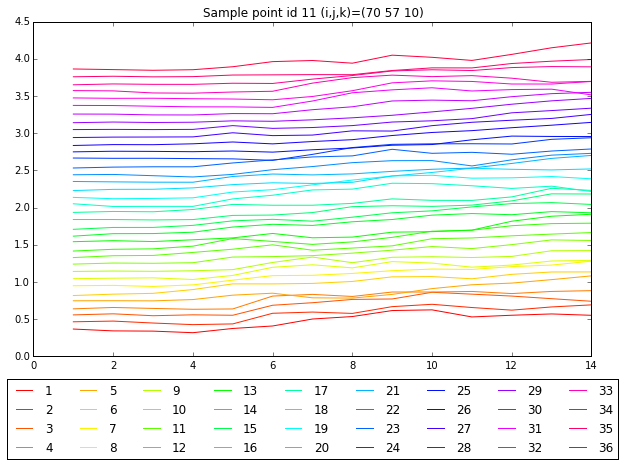

(14, 36)


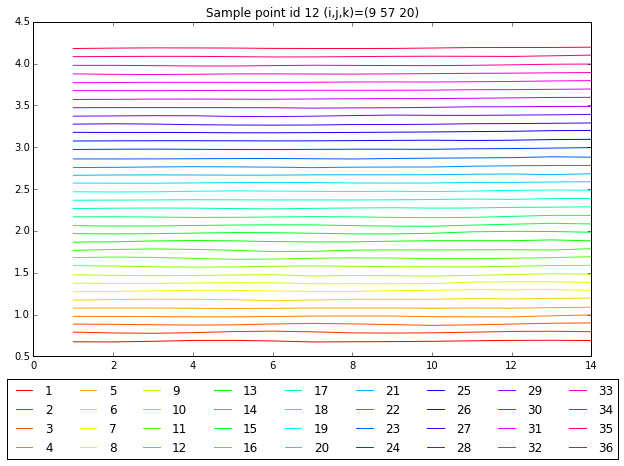

(14, 36)


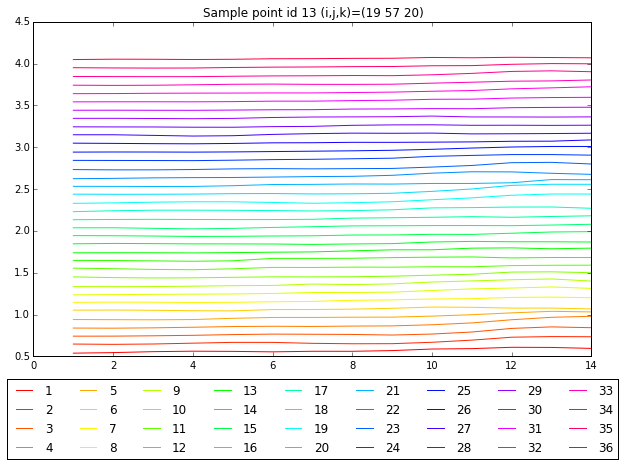

(14, 36)


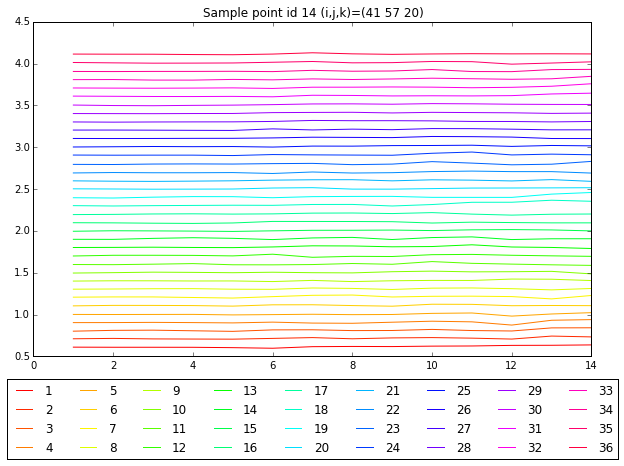

(14, 36)


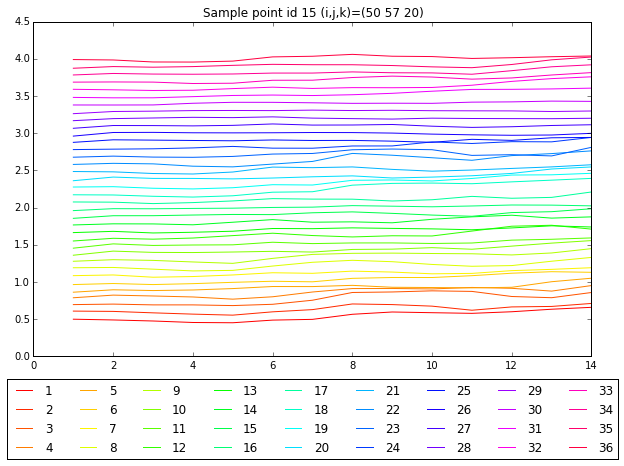

(14, 36)


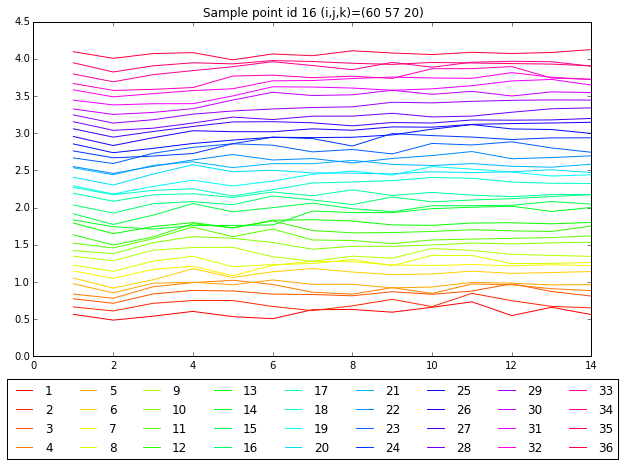

(14, 36)


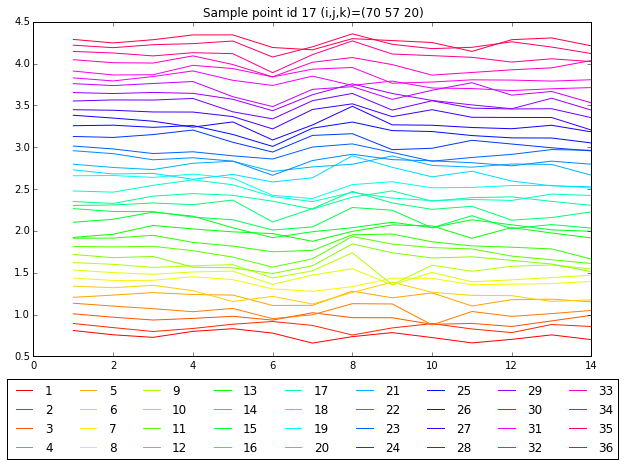

(14, 36)


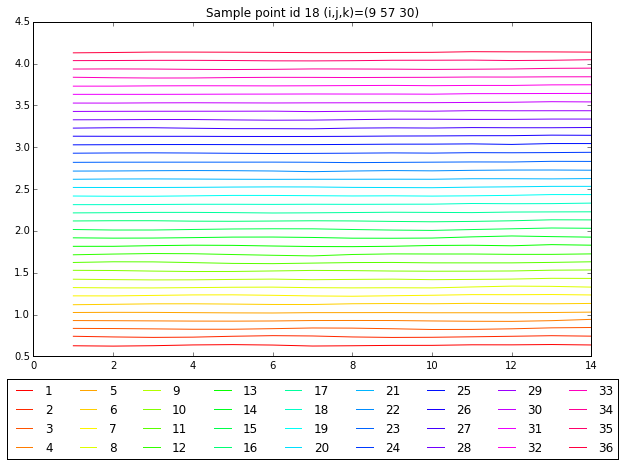

(14, 36)


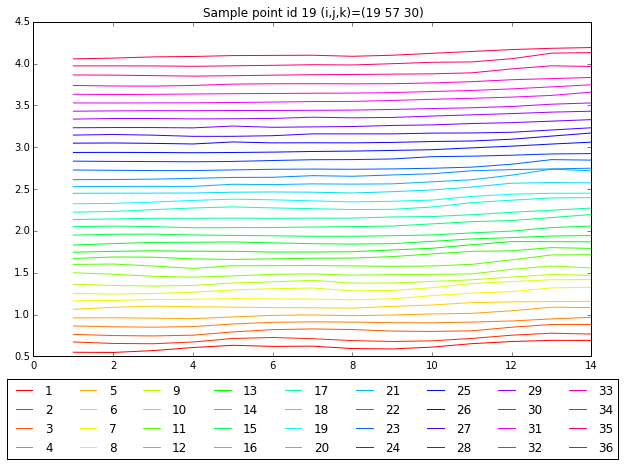

(14, 36)


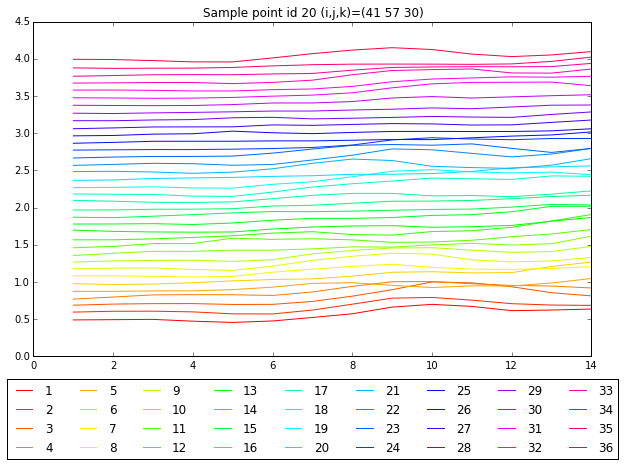

(14, 36)


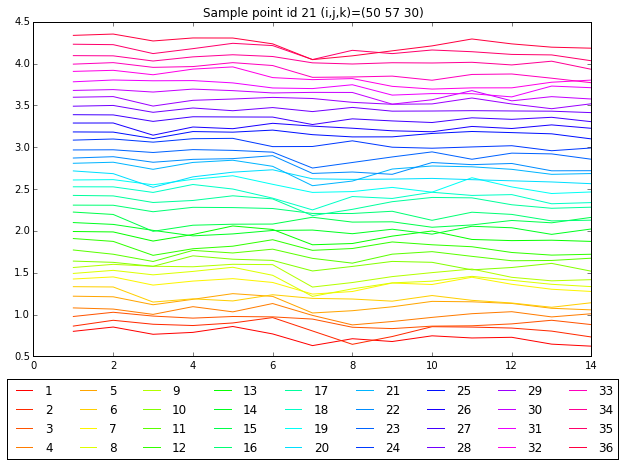

(14, 36)


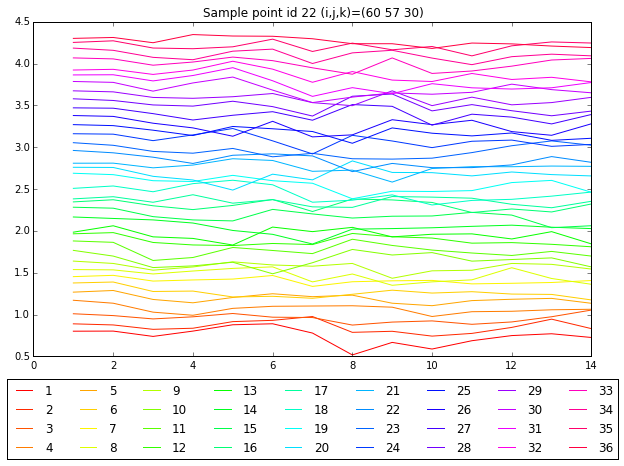

(14, 36)


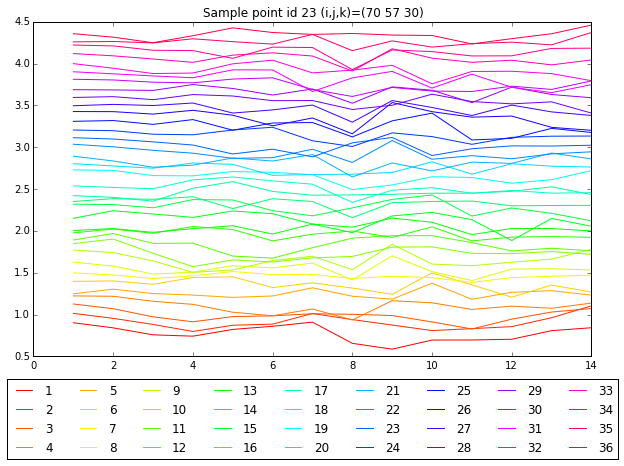

(14, 36)


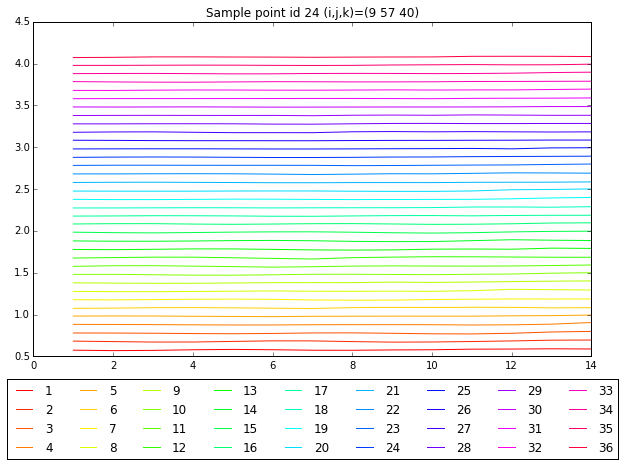

(14, 36)


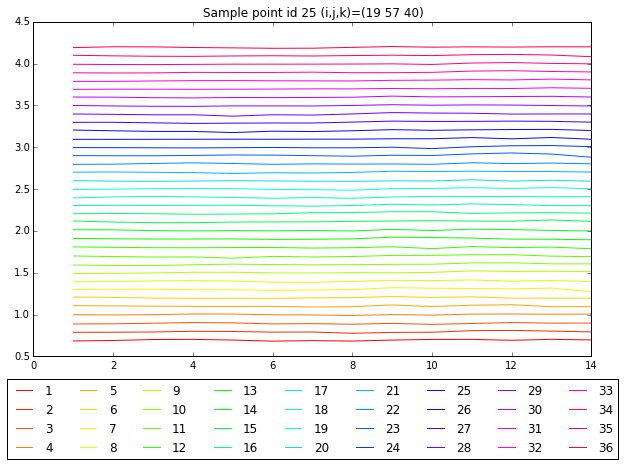

(14, 36)


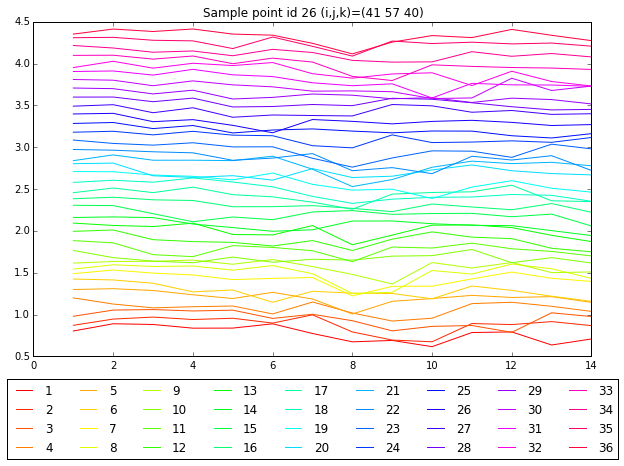

(14, 36)


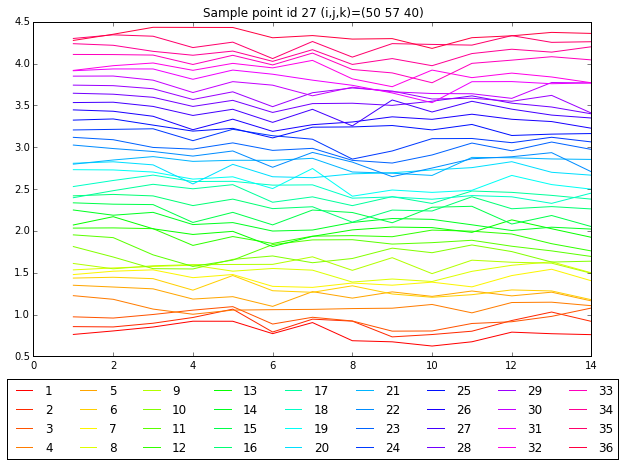

(14, 36)


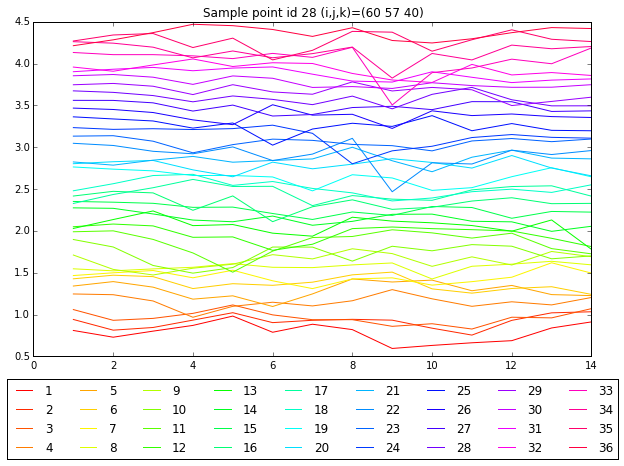

(14, 36)


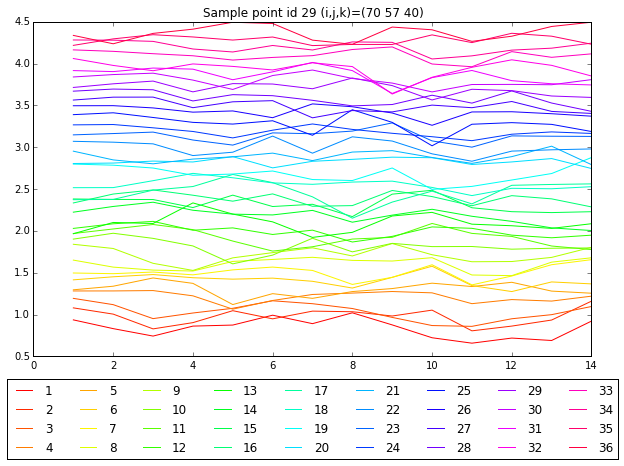

(14, 36)


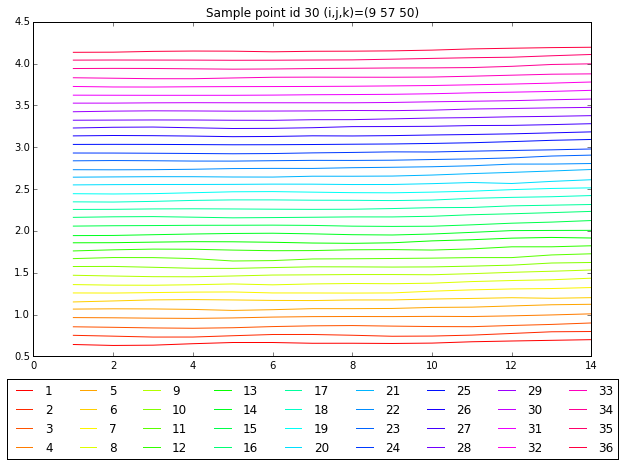

(14, 36)


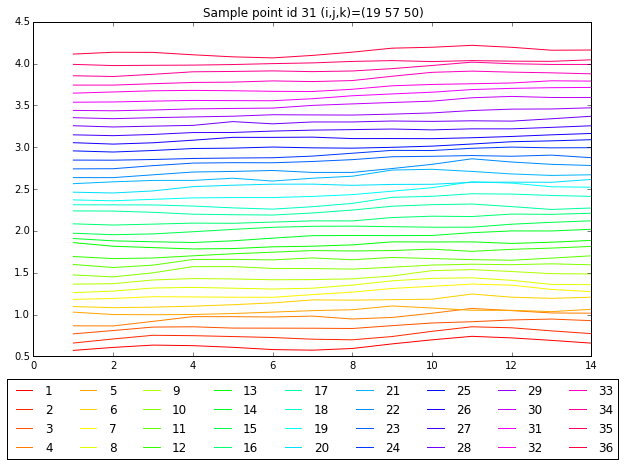

(14, 36)


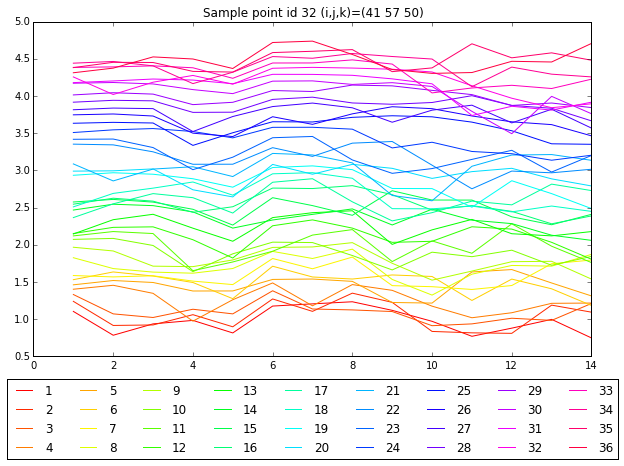

(14, 36)


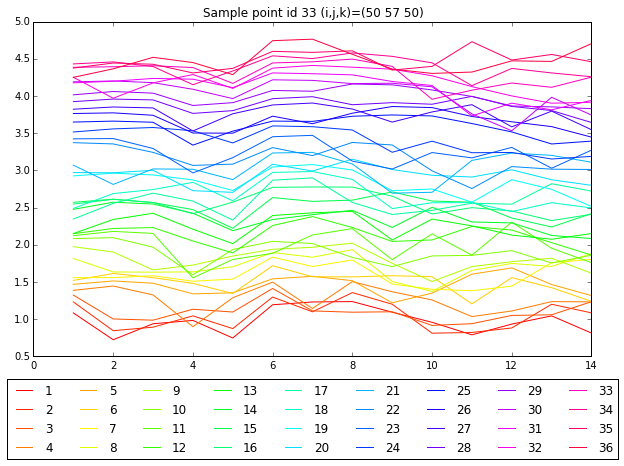

(14, 36)


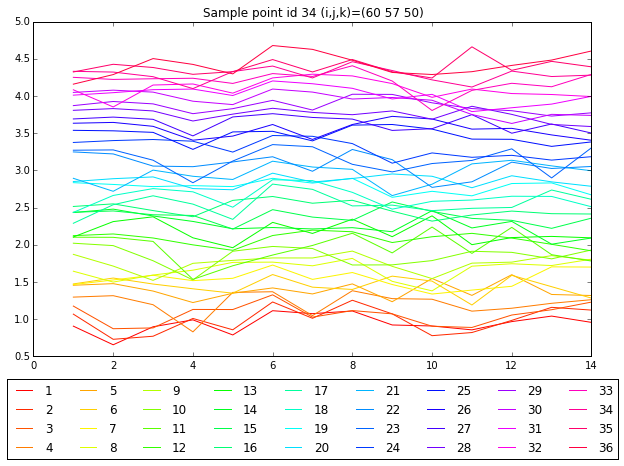

(14, 36)


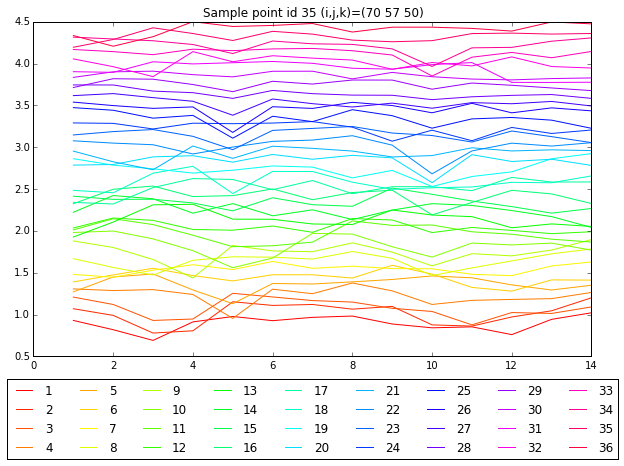

In [68]:
# dim: t, b, s
np_pressure_prob_table.shape
blocks = len(blist)
llist = [str(id) for id in range(1,blocks+1)]
cmap = plt.get_cmap('hsv')

for s in range(0, samples):
    plist = np_pressure_prob_table[:,:,s]
    print plist.shape
    
    ts = plist.shape[0]
        
    plt.figure(facecolor='white', figsize=(10,6))
    for b in range(0, blocks):
        plt.plot(range(1, ts+1), plist[:,b]+b*.1, color=cmap(float(b)/blocks))
    plt.legend(llist, 'upper center', ncol=9, bbox_to_anchor=(0.5, -0.05))
    plt.title("Sample point id %d (i,j,k)=(%d %d %d)" % (s, sample_xyz[s][0], sample_xyz[s][1], sample_xyz[s][2]))
    plt.show()


In [24]:
#np_pressure_prob_table=np_pressure_prob_table1[0:-2]
cmap = plt.get_cmap('jet')
cmap(0.5)

(0.49019607843137247, 1.0, 0.47754585705249841, 1.0)